## Exercício - Titanic
disponível em https://www.kaggle.com/c/titanic/overview

#### Descrição
O naufrágio do RMS Titanic é um dos naufrágios mais famosos da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Essa tragédia chocou a comunidade internacional e levou a melhores regulamentações de segurança para os navios.

Uma das razões pelas quais o naufrágio levou a tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta.

Nesse desafio, a atividade é que você conclua a análise de que tipo de pessoa provavelmente sobreviverá. Em particular, solicitamos você deve aplicar classificadores de árvores de decisão para esta atividade.


### Descrição do dataset
Os dados foram divididos em dois grupos:

conjunto de treinamento (train.csv)
conjunto de teste (test.csv)
O conjunto de treinamento deve ser usado para criar seus modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como "verdade do solo") para cada passageiro. Seu modelo será baseado em "atributos", como sexo e classe dos passageiros. Você também pode usar a engenharia de atributos para criar novos atributos.

Parte do conjunto de treino deve ser usado para ver o desempenho do seu modelo em dados não vistos. 

Para o conjunto de testes, não é fornecido o rótulo de classe para cada passageiro. É seu trabalho prever esses resultados. Para cada passageiro no conjunto de testes, use o modelo que você treinou para prever se eles sobreviveram ou não ao naufrágio do Titanic. O resultado deve ser submetido na plataforma Kaggle (opção **submit predictions**) a fim de calcular a acurácia. 

Também incluímos gender_submission.csv, um conjunto de previsões que supõem que todas e apenas passageiras sobrevivem, como um exemplo da aparência de um arquivo de envio.

### Dicionário de Dados

**Variable -	Definition	- Key**

survival - Survival	- 0 = No, 1 = Yes

pclass -	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd

sex -	Sex	

Age	- Age in years	

sibsp -	# of siblings / spouses aboard the Titanic	

parch- # of parents / children aboard the Titanic	

ticket - Ticket number	

fare - Passenger fare	

cabin- Cabin number	

embarked- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Resolução do Exercício

#### Importações

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import tree

#### Divisão dos dados

In [187]:
df_train = pd.read_csv('./data/train.csv')
X_test = pd.read_csv('./data/test.csv')

X_train = df_train.drop(columns=['Survived'])
y_train = df_train['Survived']

#### Tratando os dados

##### Lidando com dados faltantes

In [188]:
# Coluna 'Age'
ageMedia = round(X_train.Age.mean())
X_train.fillna({'Age': ageMedia}, inplace=True)

ageMedia = round(X_test.Age.mean())
X_test.fillna({'Age': ageMedia}, inplace=True)


# Coluna 'Embarked'
moreEmbarked = X_train.Embarked.value_counts().keys()[0]
X_train.fillna({'Embarked': moreEmbarked}, inplace=True)

# Coluna 'Fare'
fareMedia = round(X_test.Fare.mean())
X_test.fillna({'Fare': fareMedia}, inplace=True)

##### Aplicando LabelEncodet

In [189]:
labEncoder = preprocessing.LabelEncoder()

# Para os dados de treino:
X_train['Name'] = labEncoder.fit_transform(X_train['Name'])
X_train['Ticket'] = labEncoder.fit_transform(X_train['Ticket'])
X_train['Cabin'] = labEncoder.fit_transform(X_train['Cabin'])
X_train['Sex'] = labEncoder.fit_transform(X_train['Sex'])

# Para os dados de teste:
X_test['Name'] = labEncoder.fit_transform(X_test['Name'])
X_test['Ticket'] = labEncoder.fit_transform(X_test['Ticket'])
X_test['Cabin'] = labEncoder.fit_transform(X_test['Cabin'])
X_test['Sex'] = labEncoder.fit_transform(X_test['Sex'])

##### Aplicando OneHotEncoder

In [190]:
onHotEncoder = preprocessing.OneHotEncoder()

# Para os dados de treino:
embarked_infos = onHotEncoder.fit_transform(X_train.Embarked.values.reshape(-1, 1)).toarray()

df_embarked_OneHot = pd.DataFrame(embarked_infos, columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S'])

X_train = pd.concat([X_train, df_embarked_OneHot], axis=1)
X_train = X_train.drop(['Embarked'], axis=1)

# Para os dados de test:
embarked_infos_test = onHotEncoder.fit_transform(X_test.Embarked.values.reshape(-1, 1)).toarray()

df_embarked_OneHot_test = pd.DataFrame(embarked_infos_test, columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S'])

X_test = pd.concat([X_test, df_embarked_OneHot_test], axis=1)
X_test = X_test.drop(['Embarked'], axis=1)


##### Dropando a coluna de ID

In [191]:
X_train = X_train.drop('PassengerId', axis=1)

PassengerId = X_test['PassengerId']
X_test = X_test.drop('PassengerId', axis=1)

#### Treinando o classificador

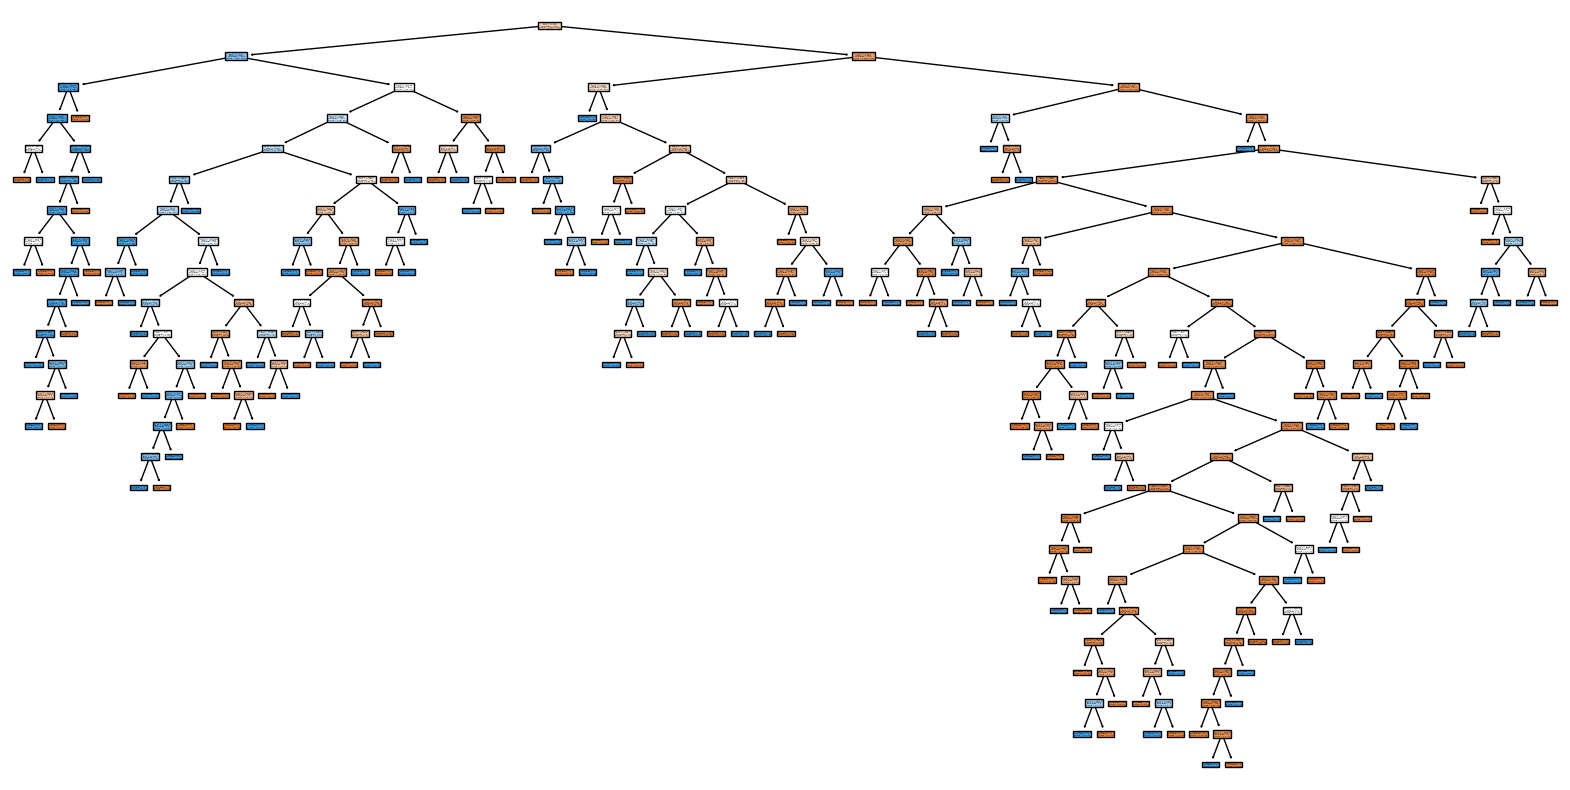

In [192]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Ajustando o modelo para as features mais importantes:
df = pd.DataFrame(dt.feature_importances_)
idx = df[ df[0] > 0.01 ].index

dt.fit(X_train.iloc[:, idx], y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(dt, filled=True)
plt.show()


#### Realizando as previsões

In [193]:
y_pred = dt.predict(X_test.iloc[:, idx])

submission = pd.concat([PassengerId, pd.DataFrame({'Survived': y_pred})], axis=1)

### Dados para o cálculo da acurácia no site do Kaggle

In [194]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [195]:
submission.to_csv('submission.csv', index=False)

#### Resultado da acurácia

<div align="center">
    <img src="./submission.png" alt="Resultado da acurácia" />
<div>